# Logistic regression

This is an implementation of logistic regression. batch gradient descent is used to fit the model paramaters

I build a model to address the famous kaggle titanic problem, a binary classification problem. Individuals must be predicted as having survived or not survived the titanic disaster.

### import modules

In [16]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.metrics import f1_score, accuracy_score

%matplotlib inline
pd.set_option('max.rows', None)

### read data

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
feats = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

### impute Age NA values with mean  

In [5]:
feats.Age = feats.Age.fillna(data.Age.mean())

/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [6]:
feats.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


the features x are a n diensional vector:
$$x \in \mathbb{R}^{n}$$
    
the weights w are a n dimensional vector
$$w \in \mathbb{R}^{n}$$
z is a linear combination of the weihts an feature values such that:

$$z \in w^{T}x$$
    
a s the logistic function where:

$$y = a(z)$$

$$a = \frac{1}{1+e^{-z}}$$
    


In [7]:
def sigmoid(feature_vector, weights):
    
    '''
    takes in vector of feature values and vector of weights and computes output from logistic function
    
    '''
    
    # calculate 'z'
    linear_combination = np.dot(feature_vector, weights)
    
    # input 'z' into logistic function
    function_output = 1 / (1+np.exp(-linear_combination))
    
    return(function_output)
    

### fitting the logistic function with batch gradient descent

loss function for logistic function is $$ L(w, y) = (-[ylog(y)+(1-y)log(1-y)]$$


cost function for logistic function is $$ J(w) = \frac{1}{m}\sum_{i=1}^{m} L(w, y)$$


In order to minimise the cost function batch gradient descent algorithm is used:

$$repeat\, until\, convergence$$


$$\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\{$$
$$w := w - \alpha\frac{\partial{J}}{\partial{w_j}}$$
  $$\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\}$$
  
  
According to the chain rule:


$$\frac{\partial{L}}{\partial{w_j}} = \frac{\partial{z}}{\partial{w_j}}*\frac{\partial{a}}{\partial{z}}*\frac{\partial{L}}{\partial{a}}$$


which means one can calculate $\frac{\partial{L}}{\partial{w_j}}$ in the following way


$$\frac{\partial{L}}{\partial{w_j}} = (a-y)*X_j$$

In the below block of code  $\frac{\partial{L}}{\partial{w_j}}$ is represented by the vector 'dw' and $w$ is represented by the vector 'old_params'.


In [8]:
def logisticRegression(features, y, alpha = 0.05, totalIterations=100):

    '''
    fits logistic regression model to data with batch gradient descent
    
    features: pandas dataframe containing features
    y: pandas series containing labels
    alpha: learning rate
    totalIterations: number of iterations of batch gradient descent
    
    '''

    X = np.array(features.T)
    X = np.insert(arr = X, values = np.ones(X.shape[1]), obj = 0, axis = 0)
    Y = np.array([y]).T
################################################################## initialise lists to store loss and cost function values   
    loss_function_values = []
    cost_function_values =[]
################################################################## initialise dictionaries 

    
################################################################## set up arrays
    row_number = features.shape[1]+1
    old_params = np.zeros((row_number, 1))
    new_params = np.zeros((row_number, 1))
    dw = np.zeros((row_number, 1))
    

################################################################## set up arrays


################################################################## loop through data 
    for counter in tqdm(range(totalIterations)):
        
        #reset dw to zeros
        dw = np.zeros(features.shape[1]+1)
        #update old paramaters with new paramaters defined from previous iteration
        old_params = new_params.copy()
        new_params = np.zeros(features.shape[1]+1)
        #Create vector Z which holds linear combinations of features for all observations
        Z = np.dot(old_params.T, X)
        #print(f'dimensions of w is {old_params.shape}')
        #print(f'dimensions of X is {X.shape}')
        #print(f'dimensions of Z is {Z.shape}')
        #create vector A which holds outputs from logistic function for all linear combinations of features in Z
        A = 1 / (1+np.exp(-Z.T))
        #print(f'dimensions of A is {A.shape}')
        #create vector A containing all errors
        #print(f'dimensions of Y is {Y.shape}')
        E = A - Y

################################################################## update dw
        #record all average dw values for all features
        #print(f'dimensions of E is {E.shape}')
        ### got to here
        dw = np.dot(E.T,X.T).T
        #print(f'dimensions of dw is {dw.shape}')
        average_dw = dw/X.shape[1]    
        #print(f'average_dw is {average_dw}')
################################################################## update dw


################################################################## record loss function
            
        loss_function_outputs = -(Y*(np.log(A))+((1-Y)*np.log(1-A)))
        #print(f'dimension of loss_function_outputs is{loss_function_outputs.shape}')
        cost_function_output = sum(loss_function_outputs)/X.shape[1]
        #print(f'cost_function_output value is {cost_function_output}')
        cost_function_values.append(cost_function_output[0])
################################################################## record loss function  


################################################################## update feature weights
        #print(f'dimensions of average_dw is {average_dw.shape}')
        #print(f'dimensions of old_params is {old_params.shape} before')
        new_params = old_params-alpha*(average_dw)
        #print(f'dimensions of new_params is {new_params.shape} after')
################################################################## update feature weights

    return(new_params, cost_function_values)

In [9]:
weights, cost_function_outputs = logisticRegression(features = feats, y = data['Survived'], alpha = 0.003, totalIterations=100000)

100%|██████████| 100000/100000 [01:08<00:00, 1458.68it/s]


### Fitted paramater values

In [10]:
print('model weights are {0}'.format(weights))

model weights are [[ 2.17066313]
 [-0.80930429]
 [-0.0331907 ]
 [-0.2314992 ]
 [ 0.21131629]
 [ 0.00611757]]


### plot showing output of cost function for each iteration of gradient descent

The cost function values decreases for each iteration of gradient descent

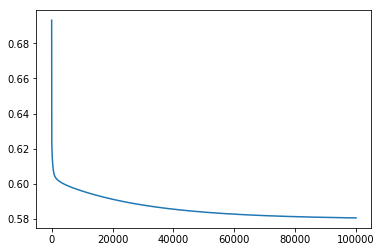

In [11]:
a = pd.Series(cost_function_outputs) 
a.plot()

### function to predict survival based on feature values

i should vectorise the function that predicts

In [12]:
def predict(data, weights, x_cols, sensitivity = 0.5):
    
    '''
    predicts survival using fitted logistic regression model'''
    
    results = []
    for row_number in range(data.shape[0]):

        #loops through data and stores the feature vector and label
        feature_vector = np.array(list(data.iloc[row_number][x_cols]))
        feature_vector = np.insert(feature_vector, obj = [0], values = 1)
  
    
        linear_combination = np.dot(feature_vector, weights)
    
        function_output = 1 / (1+np.exp(-linear_combination))
        
        if function_output >= sensitivity:
            results.append(1)
        else:
            results.append(0)
        
    return(results)

### predict using fitted paramaters

In [13]:
results = predict(data, weights, x_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], sensitivity=0.5)

In [17]:
f1Score = f1_score(y_true=data['Survived'], y_pred=results)
accuracyScore = accuracy_score(y_true=data['Survived'], y_pred=results)

This is a rough measure of goodness of fit as I'm using predictions based off of the training data, this isn't a proper assesment of the model otherwise I would use 10-fold stratified cross-validation. This is simply to check that the model has learned. The model does better than a random sequence of ones and zeros so it was a success

In [21]:
print(f'f1_score is {f1Score}')
print(f'accuracy_score is {accuracyScore}')

f1_score is 0.5056603773584906
accuracy_score is 0.7059483726150393


To increase the model goodness of fit more iterations of gradient descent should be used

In [22]:
from numpy.random import randint

In [26]:
randomLabel = pd.Series(randint(low = 0, high =2, size = data.shape[0]))

In [27]:
f1ScoreRandom = f1_score(y_true=data['Survived'], y_pred=randomLabel)
accuracyScoreRandom = accuracy_score(y_true=data['Survived'], y_pred=randomLabel)

In [28]:
print(f'f1_score is {f1ScoreRandom}')
print(f'accuracy_score is {accuracyScoreRandom}')

f1_score is 0.43663739021329984
accuracy_score is 0.49607182940516276
